In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
glog = cv2.imread("./filters/glasses.png",cv2.IMREAD_UNCHANGED)
must = cv2.imread("./filters/mustache.png",cv2.IMREAD_UNCHANGED)

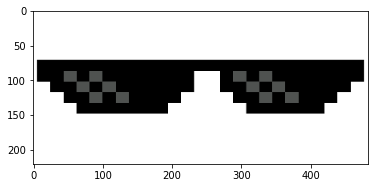

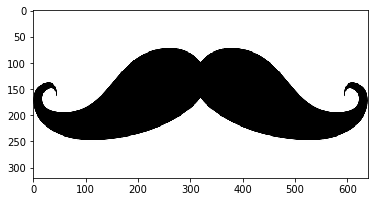

In [3]:
plt.imshow(glog)
plt.show()
plt.imshow(must)
plt.show()

In [4]:
def Glasses(eyes,frame,glg):
    if(len(eyes) == 2):

        x1,y1,w1,h1 = eyes[0]
        x2,y2,w2,h2 = eyes[1]
        
        w = int(1.40*(abs(x2 - x1) + max(w2,w1)))
        h = int(1.40*(abs(y2 - y1) + max(h2,h1)))            
        
        glg = cv2.resize(glg,(w,h))
        
        xp = min(x1,x2) - int(w/6.5)
        yp = min(y2,y1) - h//7
        
        for y in range(glg.shape[0]):
            for x in range(glg.shape[1]):
                if( glg[y][x][3] > 0):
                    frame[yp + y,xp + x, : ] = glg[y,x, :-1 ]
    
    return frame

In [5]:
def Moustache(nose,frame,mst):
    
    if len(nose)==0 or len(nose) > 4:
        return frame
    
    else:
        
        x1,y1,w1,h1 = nose
        w = int(1.2*w1)
        h = h1
        mst = cv2.resize(mst,(w,h))

        xp = x1
        yp = int(1.08*y1)

        for y in range(mst.shape[0]):
            for x in range(mst.shape[1]):
                if( mst[y][x][3] > 0):
                    frame[yp + y,xp + x, : ] = mst[y,x, :-1 ]
        return frame

In [6]:
cap = cv2.VideoCapture(0)
eye_cascade = cv2.CascadeClassifier("./eye.xml")
mst_cascade = cv2.CascadeClassifier("./Nose18x15.xml")
while True:
    ret,frame = cap.read()
    
    if ret == False:
        continue
        
    eyes = eye_cascade.detectMultiScale(frame,1.3,5)
    
    frame = Glasses(eyes,frame,glog)
    
    nose = mst_cascade.detectMultiScale(frame,1.3,5)
    
    if len(nose) >= 1:
        nose = sorted(nose,key= lambda t : t[2]*t[3])
        frame = Moustache(nose[-1],frame,must)
    
    cv2.imshow("SNAPCHAT",frame)
    key_pressed = cv2.waitKey(1) & 0xFF
    if key_pressed == ord('q'):
        break
    
        
cap.release()
cv2.destroyAllWindows()